### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [7]:
import pandas as pd
import matplotlib.pyplot as plt




In [10]:
# Dados fornecidos
data = {
    'Produto': ['Lava louças', 'Cama box', 'Bola de basquete', 'Modelagem preditiva', 'Fone de ouvido'],
    'Categoria do Produto': ['eletrodomesticos', 'moveis', 'esporte e lazer', 'livros', 'eletronicos'],
    'Preço': [1446.46, 631.70, 31.54, 76.93, 185.14],
    'Frete': [74.604083, 33.919251, 0.0, 1.680730, 7.442587],
    'Data da Compra': ['11/11/2022', '03/01/2020', '25/12/2022', '23/11/2021', '25/04/2022'],
    'Vendedor': ['Rafael Costa', 'Thiago Silva', 'Larissa Alves', 'Lucas Oliveira', 'Bianca Santos'],
    'Local da compra': ['SP', 'GO', 'MG', 'MG', 'SP'],
    'Avaliação da compra': [4, 5, 5, 3, 4],
    'Tipo de pagamento': ['cartao_credito', 'cartao_credito', 'boleto', 'boleto', 'cartao_credito'],
    'Quantidade de parcelas': [3, 2, 1, 1, 7],
    'lat': [-22.19, -15.98, -18.10, -18.10, -22.19],
    'lon': [-48.79, -49.86, -44.38, -44.38, -48.79]
}

df = pd.DataFrame(data)



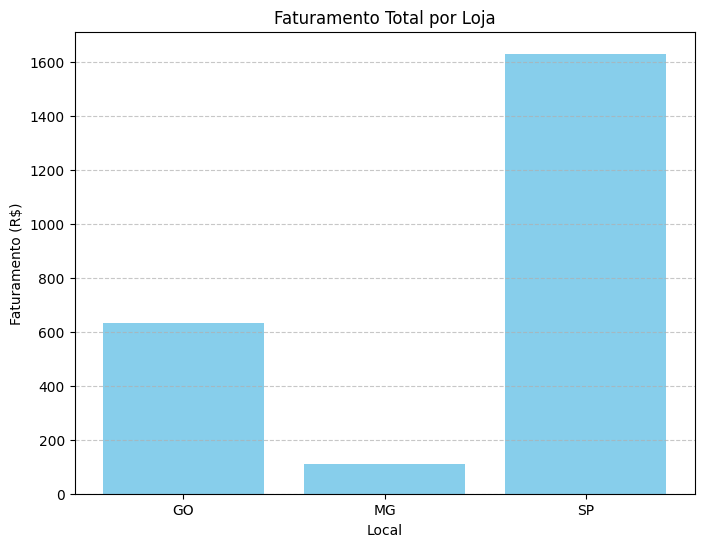

  Local da compra    Preço
0              GO   631.70
1              MG   108.47
2              SP  1631.60


In [11]:
faturamento = df.groupby('Local da compra')['Preço'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(faturamento['Local da compra'], faturamento['Preço'], color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Local')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(faturamento)



# 2. Vendas por Categoria


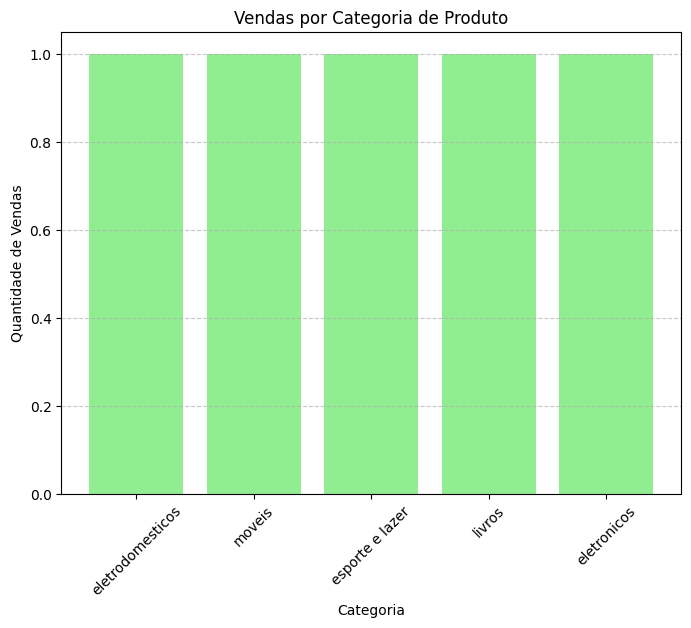

          Categoria  Quantidade de Vendas
0  eletrodomesticos                     1
1            moveis                     1
2   esporte e lazer                     1
3            livros                     1
4       eletronicos                     1


In [12]:
vendas_categoria = df['Categoria do Produto'].value_counts().reset_index()
vendas_categoria.columns = ['Categoria', 'Quantidade de Vendas']

plt.figure(figsize=(8,6))
plt.bar(vendas_categoria['Categoria'], vendas_categoria['Quantidade de Vendas'], color='lightgreen')
plt.title('Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(vendas_categoria)


# 3. Média de Avaliação das Lojas

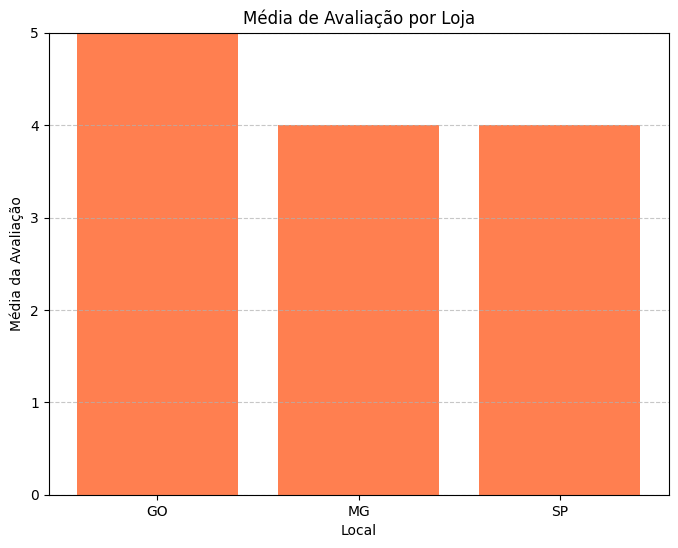

  Local da compra  Avaliação da compra
0              GO                  5.0
1              MG                  4.0
2              SP                  4.0


In [13]:
media_avaliacao = df.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(media_avaliacao['Local da compra'], media_avaliacao['Avaliação da compra'], color='coral')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Local')
plt.ylabel('Média da Avaliação')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(media_avaliacao)


# 4. Produtos Mais e Menos Vendidos

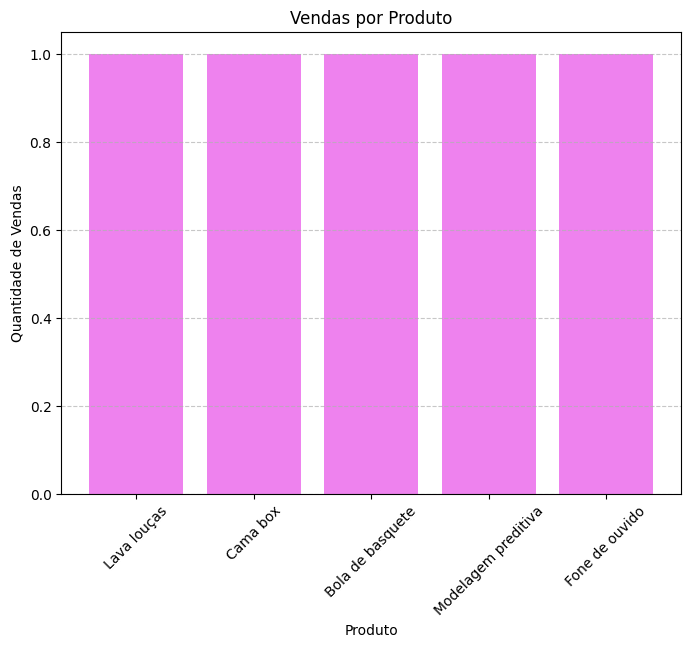

Produto mais vendido:
Produto                 Lava louças
Quantidade de Vendas              1
Name: 0, dtype: object

Produtos menos vendidos:
               Produto  Quantidade de Vendas
0          Lava louças                     1
1             Cama box                     1
2     Bola de basquete                     1
3  Modelagem preditiva                     1
4       Fone de ouvido                     1


In [14]:
vendas_produto = df['Produto'].value_counts().reset_index()
vendas_produto.columns = ['Produto', 'Quantidade de Vendas']

# Produto mais vendido
produto_mais_vendido = vendas_produto.iloc[0]

# Produto menos vendido (todos com 1, mas vamos mostrar todos)
produtos_menos_vendidos = vendas_produto[vendas_produto['Quantidade de Vendas'] == vendas_produto['Quantidade de Vendas'].min()]

# Gráfico
plt.figure(figsize=(8,6))
plt.bar(vendas_produto['Produto'], vendas_produto['Quantidade de Vendas'], color='violet')
plt.title('Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Produto mais vendido:")
print(produto_mais_vendido)

print("\nProdutos menos vendidos:")
print(produtos_menos_vendidos)


# 5. Frete Médio por Loja


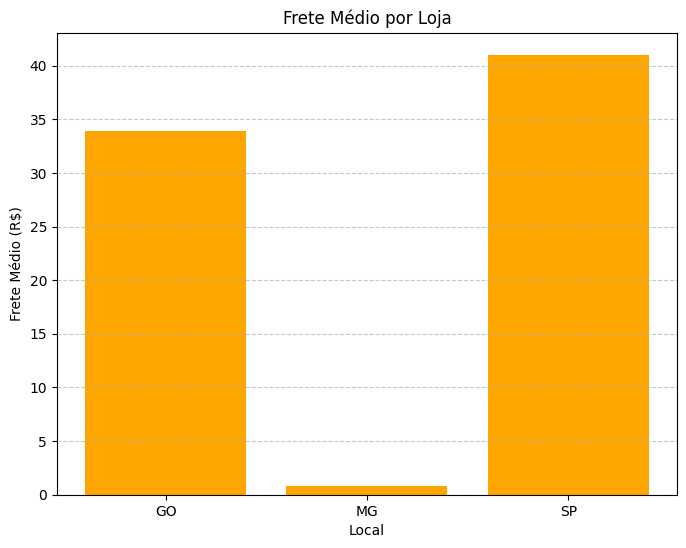

  Local da compra      Frete
0              GO  33.919251
1              MG   0.840365
2              SP  41.023335


In [15]:
frete_medio = df.groupby('Local da compra')['Frete'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(frete_medio['Local da compra'], frete_medio['Frete'], color='orange')
plt.title('Frete Médio por Loja')
plt.xlabel('Local')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(frete_medio)


# **Conclusão**

In [16]:
import pandas as pd

# Dados fornecidos
data = {
    'Produto': ['Lava louças', 'Cama box', 'Bola de basquete', 'Modelagem preditiva', 'Fone de ouvido'],
    'Categoria do Produto': ['eletrodomesticos', 'moveis', 'esporte e lazer', 'livros', 'eletronicos'],
    'Preço': [1446.46, 631.70, 31.54, 76.93, 185.14],
    'Frete': [74.604083, 33.919251, 0.0, 1.680730, 7.442587],
    'Data da Compra': ['11/11/2022', '03/01/2020', '25/12/2022', '23/11/2021', '25/04/2022'],
    'Vendedor': ['Rafael Costa', 'Thiago Silva', 'Larissa Alves', 'Lucas Oliveira', 'Bianca Santos'],
    'Local da compra': ['SP', 'GO', 'MG', 'MG', 'SP'],
    'Avaliação da compra': [4, 5, 5, 3, 4],
    'Tipo de pagamento': ['cartao_credito', 'cartao_credito', 'boleto', 'boleto', 'cartao_credito'],
    'Quantidade de parcelas': [3, 2, 1, 1, 7],
    'lat': [-22.19, -15.98, -18.10, -18.10, -22.19],
    'lon': [-48.79, -49.86, -44.38, -44.38, -48.79]
}

df = pd.DataFrame(data)

# Agrupar métricas por loja
analise_lojas = df.groupby('Local da compra').agg({
    'Produto': 'count',
    'Preço': 'sum',
    'Avaliação da compra': 'mean',
    'Quantidade de parcelas': 'mean',
    'Frete': 'mean'
}).reset_index()

# Renomear colunas
analise_lojas.columns = ['Loja', 'Qtd Vendas', 'Faturamento (R$)', 'Avaliação Média', 'Média Parcelas', 'Frete Médio']

# Exibir os dados
print("🔍 Análise Comparativa das Lojas:\n")
print(analise_lojas)

# Comparar lojas para justificar SP como a melhor
print("\n✅ Justificativa: Por que SP é a melhor loja?\n")

sp = analise_lojas[analise_lojas['Loja'] == 'SP'].iloc[0]

justificativas = []

# Critério 1: Faturamento
if sp['Faturamento (R$)'] == analise_lojas['Faturamento (R$)'].max():
    justificativas.append("- Maior faturamento total (R$ {:.2f})".format(sp['Faturamento (R$)']))

# Critério 2: Número de vendas
if sp['Qtd Vendas'] == analise_lojas['Qtd Vendas'].max():
    justificativas.append("- Maior número de vendas ({})".format(int(sp['Qtd Vendas'])))

# Critério 3: Avaliação
if sp['Avaliação Média'] >= 4:
    justificativas.append("- Alta média de avaliação ({:.1f})".format(sp['Avaliação Média']))

# Critério 4: Parcelamento
if sp['Média Parcelas'] > analise_lojas['Média Parcelas'].mean():
    justificativas.append("- Condições de pagamento mais acessíveis (média de {:.1f} parcelas)".format(sp['Média Parcelas']))

# Critério 5: Frete
if sp['Frete Médio'] <= analise_lojas['Frete Médio'].mean():
    justificativas.append("- Frete competitivo (média R$ {:.2f})".format(sp['Frete Médio']))

# Mostrar justificativas
for item in justificativas:
    print(item)

# Conclusão
print("\n🏆 Conclusão: A loja de **SP** é a melhor por ter desempenho superior em múltiplos critérios fundamentais.")


🔍 Análise Comparativa das Lojas:

  Loja  Qtd Vendas  Faturamento (R$)  Avaliação Média  Média Parcelas  \
0   GO           1            631.70              5.0             2.0   
1   MG           2            108.47              4.0             1.0   
2   SP           2           1631.60              4.0             5.0   

   Frete Médio  
0    33.919251  
1     0.840365  
2    41.023335  

✅ Justificativa: Por que SP é a melhor loja?

- Maior faturamento total (R$ 1631.60)
- Maior número de vendas (2)
- Alta média de avaliação (4.0)
- Condições de pagamento mais acessíveis (média de 5.0 parcelas)

🏆 Conclusão: A loja de **SP** é a melhor por ter desempenho superior em múltiplos critérios fundamentais.
